In [1]:
from pickle import load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape
breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [2]:
X = breast_dataset.drop(columns=['label'])
Y = breast_dataset['label']

In [3]:
#split the dataset for 80% training data and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

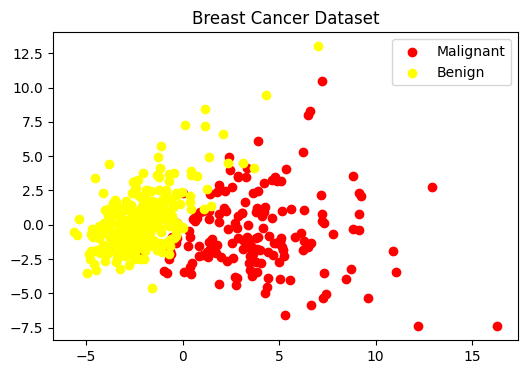

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[Y_train == 0, 0], X_train_pca[Y_train == 0, 1],
            color='red', label='Malignant')
plt.scatter(X_train_pca[Y_train == 1, 0], X_train_pca[Y_train == 1, 1],
            color='yellow', label='Benign')
plt.title('Breast Cancer Dataset')
plt.legend()
plt.show()


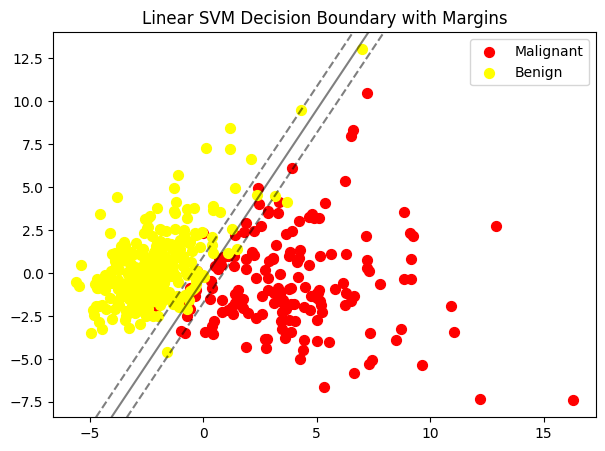

In [18]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Train linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_pca, Y_train)

# Define grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Evaluate decision function for each grid point
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot points
plt.figure(figsize=(7, 5))
plt.scatter(X_train_pca[Y_train==0, 0], X_train_pca[Y_train==0, 1],
            c='red', s=50, label='Malignant')
plt.scatter(X_train_pca[Y_train==1, 0], X_train_pca[Y_train==1, 1],
            c='yellow', s=50, label='Benign')

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.title("Linear SVM Decision Boundary with Margins")
plt.legend()
plt.show()


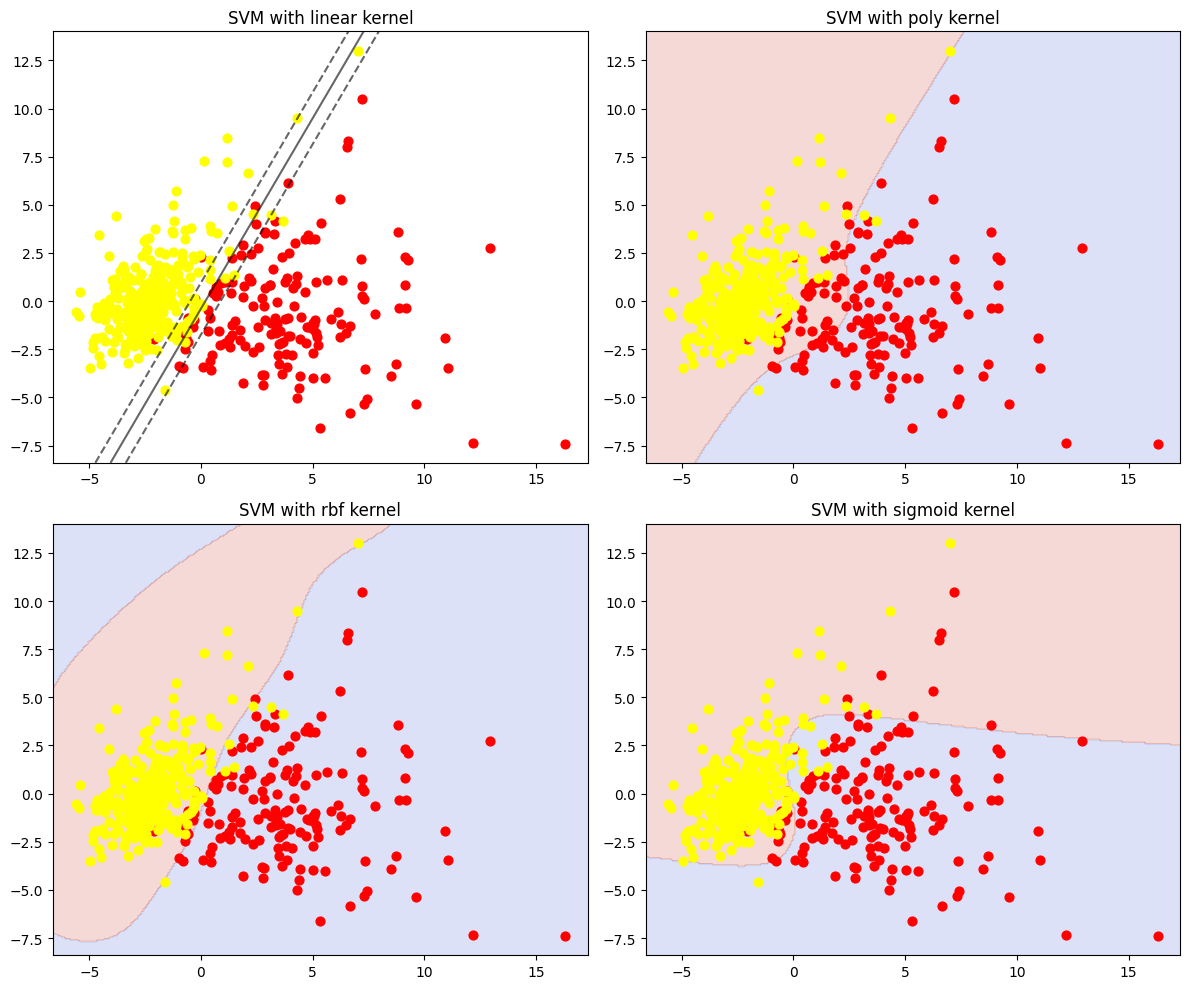

In [19]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Define kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

plt.figure(figsize=(12, 10))

for i, kernel in enumerate(kernels):
    # Train SVM with the given kernel
    svm = SVC(kernel=kernel, C=1.0, gamma='scale')
    svm.fit(X_train_pca, Y_train)

    # Define mesh grid for plotting
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Evaluate decision function or prediction on the grid
    if kernel == 'linear':
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    else:
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

    # Subplot for each kernel
    plt.subplot(2, 2, i + 1)

    if kernel != 'linear':
        plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    else:
        # Show margins for linear kernel
        plt.contour(xx, yy, Z, colors='k',
                    levels=[-1, 0, 1], alpha=0.6,
                    linestyles=['--', '-', '--'])

    plt.scatter(X_train_pca[Y_train==0, 0], X_train_pca[Y_train==0, 1],
                c='red', s=40, label='Malignant')
    plt.scatter(X_train_pca[Y_train==1, 0], X_train_pca[Y_train==1, 1],
                c='yellow', s=40, label='Benign')

    plt.title(f"SVM with {kernel} kernel")

plt.tight_layout()
plt.show()


LINEAR Kernel:
  Accuracy:  0.9825
  Precision: 0.9851
  Recall:    0.9851
------------------------------
POLY Kernel:
  Accuracy:  0.9035
  Precision: 0.8590
  Recall:    1.0000
------------------------------
RBF Kernel:
  Accuracy:  0.9825
  Precision: 0.9710
  Recall:    1.0000
------------------------------
SIGMOID Kernel:
  Accuracy:  0.9123
  Precision: 0.9254
  Recall:    0.9254
------------------------------


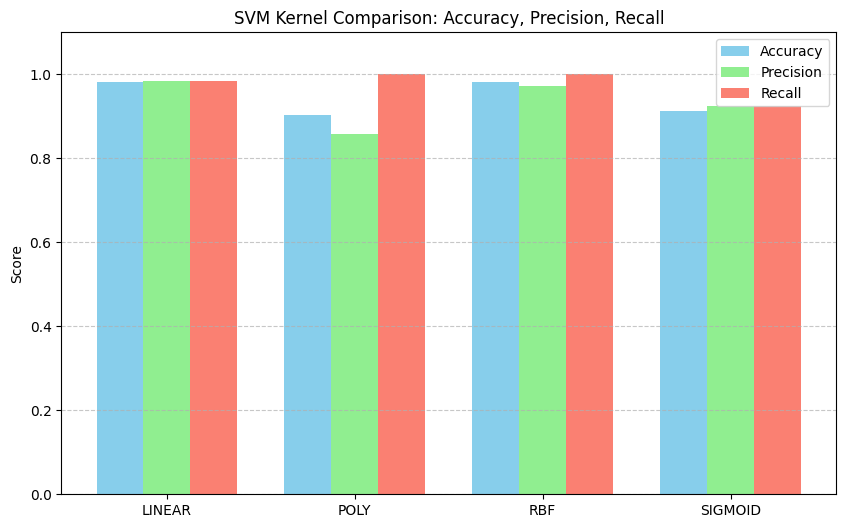

In [20]:
# Import libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
metrics = {'accuracy': [], 'precision': [], 'recall': []}

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred))
    metrics['recall'].append(recall_score(y_test, y_pred))


for i, k in enumerate(kernels):
    print(f"{k.upper()} Kernel:")
    print(f"  Accuracy:  {metrics['accuracy'][i]:.4f}")
    print(f"  Precision: {metrics['precision'][i]:.4f}")
    print(f"  Recall:    {metrics['recall'][i]:.4f}")
    print("-" * 30)

    x = np.arange(len(kernels))
width = 0.25  # width of the bars

plt.figure(figsize=(10,6))
plt.bar(x - width, metrics['accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x, metrics['precision'], width, label='Precision', color='lightgreen')
plt.bar(x + width, metrics['recall'], width, label='Recall', color='salmon')

plt.xticks(x, [k.upper() for k in kernels])
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('SVM Kernel Comparison: Accuracy, Precision, Recall')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
